In [1]:
cd F:\Machine learning projects\HeartAttack prediction

F:\Machine learning projects\HeartAttack prediction


In [2]:
pwd

'F:\\Machine learning projects\\HeartAttack prediction'

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn import preprocessing


In [4]:
train_df = pd.read_csv('heart.csv')

In [5]:
train_df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
train_df.shape

(303, 14)

In [7]:
train_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
#we dont have any null data

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [10]:
#all integer no object 

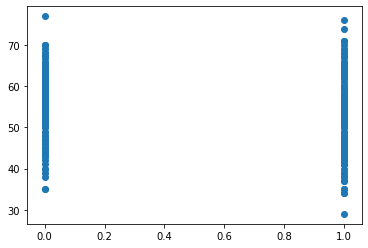

In [11]:
plt.scatter(x = 'output', y = 'age', data = train_df)

In [12]:
train_df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [13]:
train_df2 = pd.read_csv('o2Saturation.csv')

In [14]:
sns.pairplot(train_df, hue="output")

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000218B74B29D8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000218B758C840> (for post_execute):


KeyboardInterrupt: 

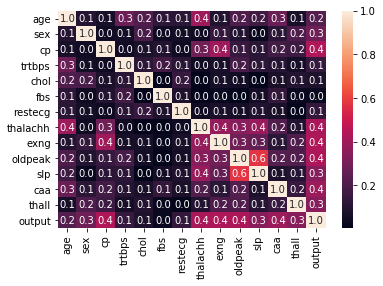

In [15]:
sns.heatmap(train_df.corr().abs(),annot = True, fmt = '0.1f')

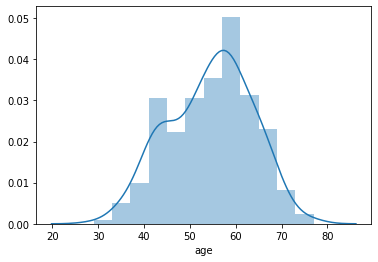

In [16]:
sns.distplot(train_df['age'])
#most of the data we have of 40 to 80 age people 

In [17]:
train_df['sex'].value_counts()
#we have 207 male and 96 women 

1    207
0     96
Name: sex, dtype: int64

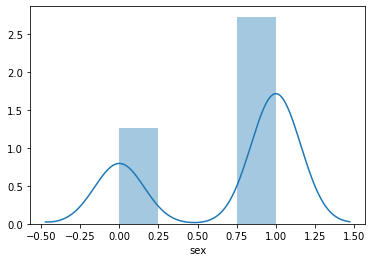

In [18]:
sns.distplot(train_df['sex'])

In [19]:
train_df['cp'].value_counts()
#cat data where 

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [20]:
#Value 1: typical angina
#Value 2: atypical angina
#Value 3: non-anginal pain
#Value 4: asymptomatic


dfc = train_df.iloc[:,2:3]

In [21]:
dfc.head()

,cp
0,3
1,2
2,1
3,1
4,0


In [22]:
ohe= preprocessing.OneHotEncoder()
c_hot = ohe.fit_transform(dfc).toarray()
dfcp =pd.DataFrame(data=c_hot, index=range(dfc.shape[0]))
dfcp.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,0,1,2,3
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0


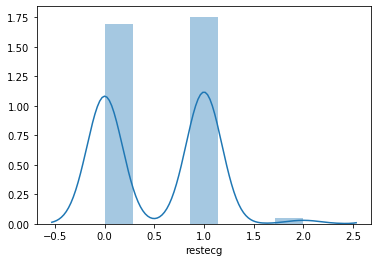

In [23]:
sns.distplot(train_df['restecg'])

In [27]:
ohe3= preprocessing.OneHotEncoder()
c_res = ohe3.fit_transform(restecg).toarray()
dfres =pd.DataFrame(data=c_res, index=range(restecg.shape[0]))
dfres.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [26]:
restecg = train_df.iloc[:,6:7]

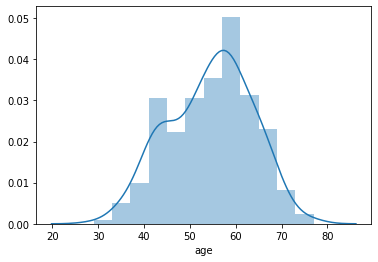

In [28]:
age= train_df.iloc[:,:1]
age.head()
sns.distplot(train_df['age'])

In [29]:
bins = [-np.inf, 40, 50, 60, 70, np.inf]
labels = ["Young", "Grown","Mature","Senior","Elder"]
age['binned age'] = pd.cut(age['age'], bins = bins, labels = labels)
print(age.isnull().sum())
age.head()

age           0
binned age    0
dtype: int64


,age,binned age
0,63,Senior
1,37,Young
2,41,Grown
3,56,Mature
4,57,Mature


In [30]:
ohe2= preprocessing.OneHotEncoder()
age = age.iloc[:,1:]

age_hot = ohe2.fit_transform(age).toarray()
dfage =pd.DataFrame(data=age_hot, index=range(age.shape[0]))
dfage.head()

,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [31]:
dfsex = train_df.iloc[:,1:2]
dftrtbps = train_df.iloc[:,3:4]
dfchol= train_df.iloc[:,4:5]
dffbs= train_df.iloc[:,5:6]
dfftha= train_df.iloc[:,7:8]
dfex= train_df.iloc[:,8:9]
dfold= train_df.iloc[:,9:10]
dfslp= train_df.iloc[:,10:11]
dfcaa= train_df.iloc[:,11:12]
dfthall= train_df.iloc[:,12:13]

In [56]:
x=pd.concat(   [ dfcp,dfchol,dfftha,dfex,dfold, dfcaa, dfthall ], axis=1)
x.head(10)

,0,1,2,3,chol,thalachh,exng,oldpeak,caa,thall
0,0.0,0.0,0.0,1.0,233,150,0,2.3,0,1
1,0.0,0.0,1.0,0.0,250,187,0,3.5,0,2
2,0.0,1.0,0.0,0.0,204,172,0,1.4,0,2
3,0.0,1.0,0.0,0.0,236,178,0,0.8,0,2
4,1.0,0.0,0.0,0.0,354,163,1,0.6,0,2
5,1.0,0.0,0.0,0.0,192,148,0,0.4,0,1
6,0.0,1.0,0.0,0.0,294,153,0,1.3,0,2
7,0.0,1.0,0.0,0.0,263,173,0,0.0,0,3
8,0.0,0.0,1.0,0.0,199,162,0,0.5,0,3
9,0.0,0.0,1.0,0.0,168,174,0,1.6,0,2


In [57]:
y= train_df.iloc[:,13:14]

In [58]:
dataframe=pd.concat([x,y],axis=1)

In [ ]:
#

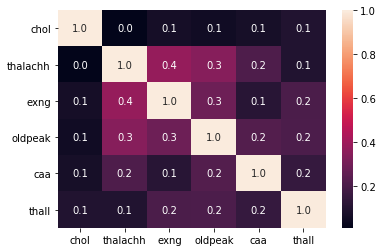

In [35]:
sns.heatmap(x.corr().abs(),annot = True, fmt = '0.1f')

In [36]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
chol        303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(6)
memory usage: 16.6 KB


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [69]:
cv_sonuc= cross_validate(RF, x, y, cv=10 , scoring='accuracy')
res=cv_sonuc['test_score'].mean()
print("Accuracy of Random Forest: ", res*100, "%")
Result.append( "RF :")
Result.append( res)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y wa

Accuracy of Random Forest:  81.0863922877271 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as ass
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

#Linear Discriminant Analysis kütüphaneleri
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.covariance import LedoitWolf
from sklearn.covariance import MinCovDet
from sklearn.covariance import OAS
from sklearn.covariance import GraphicalLasso
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier


from numpy import loadtxt

from sklearn.metrics import accuracy_score
from numpy import loadtxt


In [71]:
k_nn=KNeighborsClassifier(n_neighbors=3, metric="chebyshev")
logi = LogisticRegression(random_state=5)
DT = DecisionTreeClassifier(max_features="sqrt")
SDF = SGDClassifier(penalty="l2", random_state=10)
S_VC= SVC(degree=2,C=16, kernel="poly")
RF= RandomForestClassifier(n_estimators=70, criterion= "entropy") # criterion = "gini" or "entropy"
Bayes=  GaussianNB()
MBayes = MultinomialNB()
BBayes = BernoulliNB()
LDA = LinearDiscriminantAnalysis(solver="eigen")    #solver= ‘svd’, ‘lsqr’, ‘eigen’
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

Result =[]

In [72]:
cv_sonuc= cross_validate(clf, x, y, cv=5 , scoring='accuracy')
res=cv_sonuc['test_score'].mean()
print("Accuracy of GradientBoost: ", res*100, "%")
Result.append( "GradientBoost :")
Result.append(res)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Accuracy of GradientBoost:  80.51366120218579 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
cv_sonuc= cross_validate(k_nn, x, y, cv=5 , scoring='accuracy')
res=cv_sonuc['test_score'].mean()
print("Accuracy of KNN: ", res*100, "%")
Result.append( "KNN :")
Result.append( res)

Accuracy of KNN:  63.0327868852459 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y

In [63]:
cv_sonuc= cross_validate(logi, x, y, cv=10 , scoring='accuracy')
res=cv_sonuc['test_score'].mean()
print("Accuracy of Logistic Regression: ", res*100, "%")
Result.append( "LR :")
Result.append( res)

Accuracy of Logistic Regression:  82.69632925472747 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

In [64]:
cv_sonuc= cross_validate(DT, x, y, cv=5 , scoring='accuracy')
res=cv_sonuc['test_score'].mean()

print("Accuracy of Decision Tree: ", res*100, "%")
Result.append( "DT :")
Result.append( res)


Accuracy of Decision Tree:  76.8743169398907 %


In [65]:
cv_sonuc= cross_validate(RF, x, y, cv=10 , scoring='accuracy')
res=cv_sonuc['test_score'].mean()
print("Accuracy of Random Forest: ", res*100, "%")
Result.append( "RF :")
Result.append( res)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y wa

Accuracy of Random Forest:  79.74082313681869 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [66]:
cv_sonuc= cross_validate(Bayes, x, y, cv=5 , scoring='accuracy')
res=cv_sonuc['test_score'].mean()
print("Accuracy of Naive Bayes: ", res*100, "%")
Result.append( "NB :")
Result.append( res)

Accuracy of Naive Bayes:  79.53551912568305 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [67]:
cv_sonuc= cross_validate(MBayes, x, y, cv=5 , scoring='accuracy')
res=cv_sonuc['test_score'].mean()
print("Accuracy of Multinomial Naive Bayes: ", res*100, "%")
Result.append( "MNB :")
Result.append( res)

Accuracy of Multinomial Naive Bayes:  76.56830601092895 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [68]:
print(Result)

['GradientBoost :', 0.8051366120218579, 'KNN :', 0.630327868852459, 'LR :', 0.8269632925472747, 'DT :', 0.7687431693989071, 'RF :', 0.7974082313681868, 'NB :', 0.7953551912568305, 'MNB :', 0.7656830601092895]
